In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [111]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
data_smev= pd.read_excel("D:\c drive settinf\Desktop\EV- market segmentation feynn\Data\smev_data.xlsx",sheet_name=None)

In [4]:
data_smev['EV Industries'].head()

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615


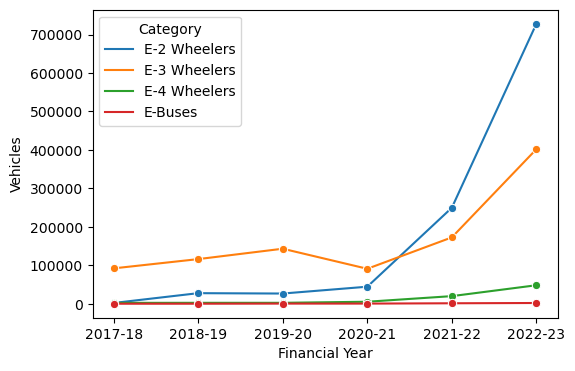

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

## From above figure we can say that two-wheelers emerged as the primary revenue generators as compared to other electric vehicals. 


In [6]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [7]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [8]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [9]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [10]:
data_ev2w.head()

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.3,Apr,1776
1,2019-20,HERO ELECTRIC,0.3,May,455
2,2019-20,HERO ELECTRIC,0.3,Jun,329
3,2019-20,HERO ELECTRIC,0.3,Jul,260
4,2019-20,HERO ELECTRIC,0.3,Aug,249


In [11]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

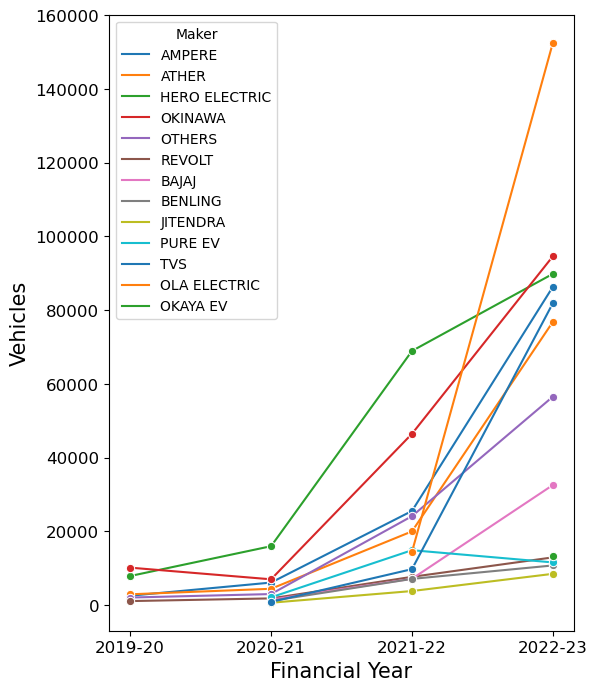

In [12]:
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

## From above figure we can say that OLA is emarging as the market leader as compared to the different companies like Bajaj,Ather.

In [13]:
data_bw = pd.read_csv("D:\c drive settinf\Desktop\EV- market segmentation feynn\Data\ev2_bikewale.csv")


In [14]:
data_model = pd.read_csv("D:\c drive settinf\Desktop\EV- market segmentation feynn\Data\ev_model_spec.csv")

In [17]:
data_bw.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [16]:
data_model.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [18]:
data_bw.isnull().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [26]:
data_bw=pd.DataFrame(data_bw)

In [33]:
data=data_bw.iloc[:,[4,5,6,8,10]]

In [34]:
data.head()

,rating,Visual Appeal,Reliability,Service Experience,Comfort
0,1,3.0,4.0,NaN,4.0
1,1,3.0,1.0,1.0,3.0
2,3,4.0,4.0,2.0,5.0
3,1,1.0,1.0,1.0,1.0
4,1,3.0,4.0,1.0,3.0


In [35]:
data.isnull().sum()

rating                  0
Visual Appeal         105
Reliability           128
Service Experience    141
Comfort               314
dtype: int64

In [40]:

data["Visual Appeal"] .value_counts()

5.0    297
4.0    203
3.0    109
1.0     91
2.0     39
Name: Visual Appeal, dtype: int64

In [41]:
# filling the missing values of visual appeal.
data["Visual Appeal"] =data["Visual Appeal"].fillna(3.0)

In [54]:
data.isnull().sum()

rating                0
Visual Appeal         0
Reliability           0
Service Experience    0
Comfort               0
dtype: int64

In [44]:
data["Reliability"] .value_counts() 

5.0    237
1.0    177
4.0    158
3.0     91
2.0     53
Name: Reliability, dtype: int64

In [45]:
data["Reliability"]=data["Reliability"] .fillna(3.0)

In [48]:
data["Service Experience"] .value_counts() 

5.0    217
1.0    211
4.0    138
3.0     89
2.0     48
Name: Service Experience, dtype: int64

In [50]:
data["Service Experience"]=data["Service Experience"] .fillna(3.0)

In [52]:
data["Comfort"] .value_counts() 

5.0    189
4.0    161
1.0     74
3.0     67
2.0     39
Name: Comfort, dtype: int64

In [53]:
data["Comfort"]=data["Comfort"] .fillna(3.0)

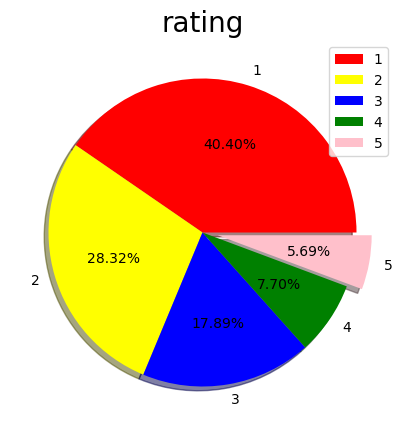

In [55]:
labels = ['1', '2','3','4','5']
size = data['rating'].value_counts()
colors = ['red', 'yellow','blue','green','pink']
explode = [0,0,0,0,0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('rating', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## In the above Pie Chart the data represents customer rating about product is not good at 4 and 5 points because, 2Wheeler electric vehicals are not satisfied their customers. it is not develod the product as per the customer usage.

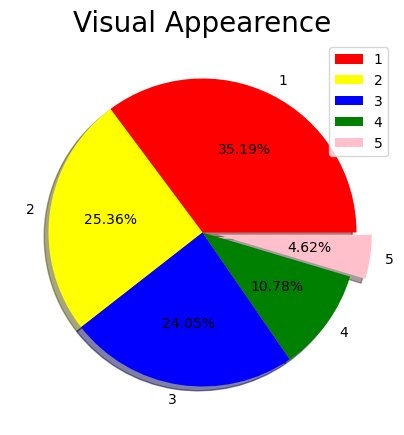

In [112]:
labels = ['1', '2','3','4','5']
size = data['Visual Appeal'].value_counts()
colors = ['red', 'yellow','blue','green','pink']
explode = [0,0,0,0,0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Visual Appearence', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


## The visual appearence of vehicals also matter for those who go for vechical having good appearence rating.

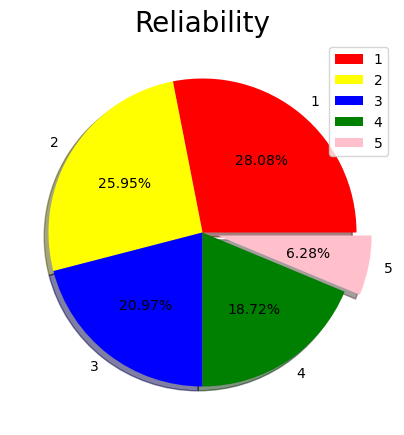

In [57]:
labels = ['1', '2','3','4','5']
size = data['Reliability'].value_counts()
colors = ['red', 'yellow','blue','green','pink']
explode = [0,0,0,0,0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Reliability', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

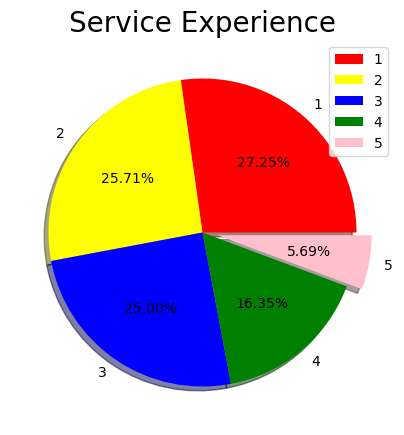

In [58]:
labels = ['1', '2','3','4','5']
size = data['Service Experience'].value_counts()
colors = ['red', 'yellow','blue','green','pink']
explode = [0,0,0,0,0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Service Experience', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## With the service experience of company customers are not satisfied, only few of companies provide it in better way.

In [67]:
data_model.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [68]:
data_model=pd.DataFrame(data_model)

In [69]:
data_model.isnull().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [88]:
data_model = data_model.drop(columns=["Model Name"])

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
MinMax=MinMaxScaler()

In [98]:
scaled_data = MinMax.fit_transform(data_model)


In [92]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()

,0,1,2,3
0,0.446619,0.562963,0.307692,0.180952
1,0.124496,0.000000,0.000000,0.000000
2,0.090707,0.000000,0.000000,0.000000
3,0.378258,0.555556,0.307692,0.180952
4,0.702379,0.488889,0.714286,0.523810


<AxesSubplot:xlabel='Price', ylabel='Riding Range (km)'>

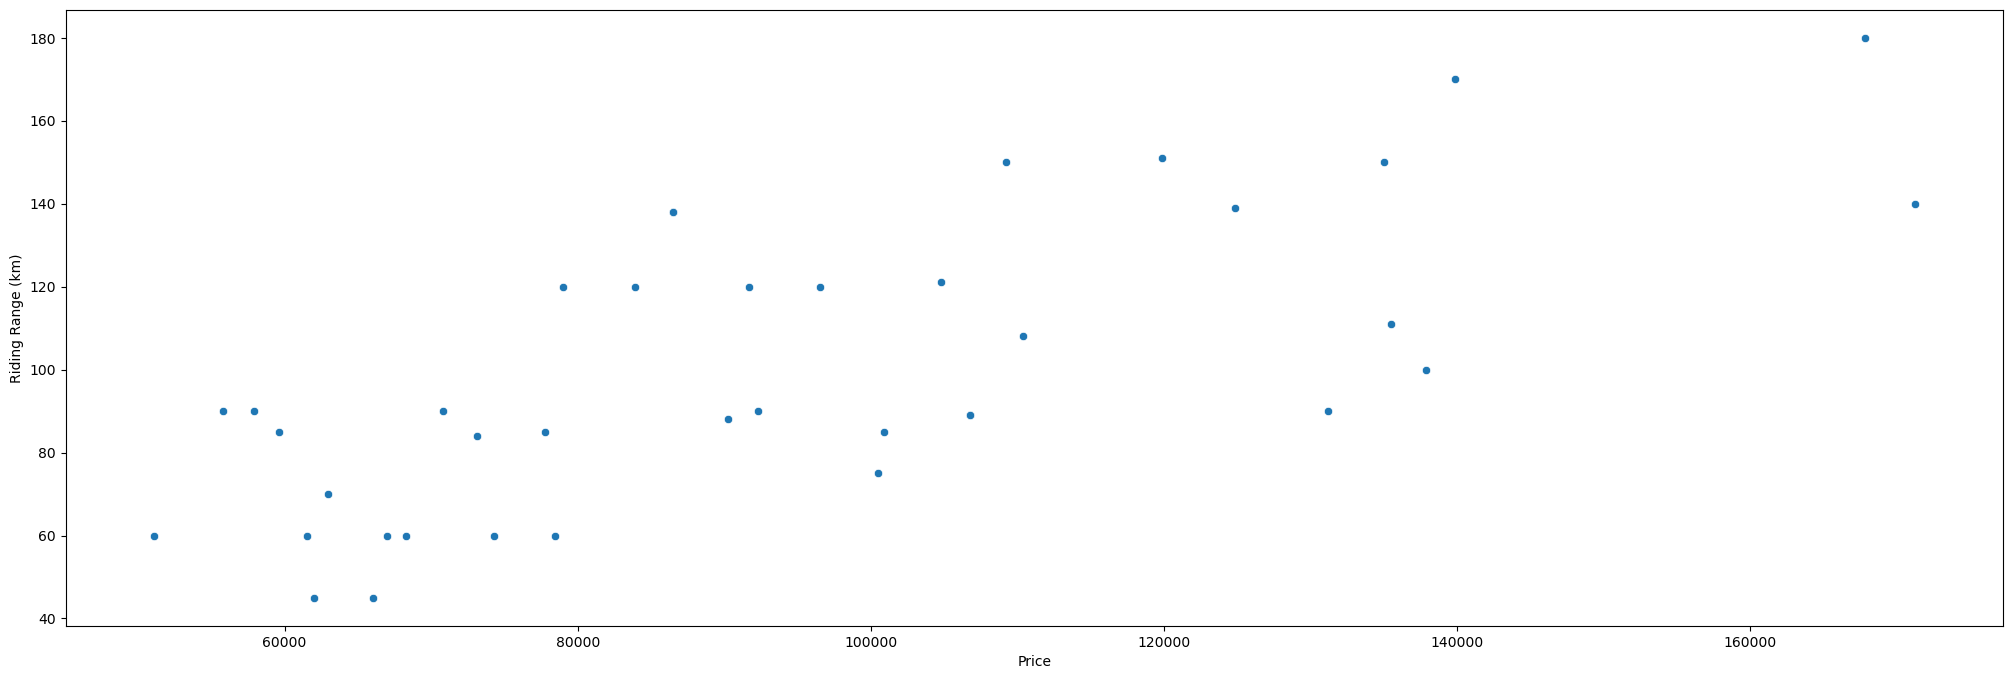

In [104]:
import seaborn as sns
sns.scatterplot(data_model["Price"],data_model["Riding Range (km)"])

## From the above diagram, as the Riding Range is increased price is also increased.

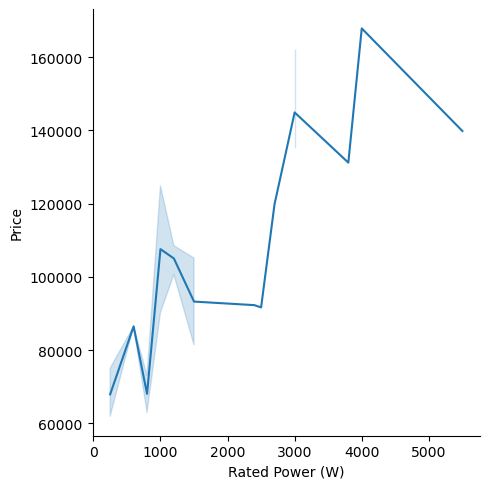

In [109]:
sns.relplot(data=data_model,y="Price",x = "Rated Power (W)",kind = "line")

## From above figure, as the Power Rate of battery is increased then Price is also increased.

# Target

### The strategic target for the electric vehicle market are identified the dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands.The visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money.

# Conclusion

### this analysis represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications.hese insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle market.
